In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 01: Loading the UCS Satellite Dataset

In [3]:
file_path= "../data/text-data/ucs_satellites.txt"

df= pd.read_csv(file_path, sep="\t", encoding="latin1")

print("Shape of the dataset: ", df.shape)
print("\nColumn names: ", df.columns)
print("\nFirst 5 rows: ", df.head())
print("\nData types: ", df.dtypes)


Shape of the dataset:  (7562, 67)

Column names:  Index(['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose', 'Class of Orbit', 'Type of Orbit',
       'Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)',
       'Eccentricity', 'Inclination (degrees)', 'Period (minutes)',
       'Launch Mass (kg.)', ' Dry Mass (kg.) ', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',
       'COSPAR Number', 'NORAD Number', 'Comments', 'Unnamed: 27',
       'Source Used for Orbital Data', 'Source', 'Source.1', 'Source.2',
       'Source.3', 'Source.4', 'Source.5', 'Source.6', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 

# Step 02: Cleaning Dataset
- Removing empty or irrelevant columns (like "Unnamed: XX").
- Standardizing column names (strip spaces, lowercase, replace spaces with underscores).

In [4]:
df= df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.columns= (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r'[^\w]', '', regex=True)
)

print("Shape after cleaning: ", df.shape)
print("\nColumn names after cleaning: \n", df.columns.tolist()[:20])


Shape after cleaning:  (7562, 35)

Column names after cleaning: 
 ['current_official_name_of_satellite', 'countryorg_of_un_registry', 'country_of_operatorowner', 'operatorowner', 'users', 'purpose', 'detailed_purpose', 'class_of_orbit', 'type_of_orbit', 'longitude_of_geo_degrees', 'perigee_km', 'apogee_km', 'eccentricity', 'inclination_degrees', 'period_minutes', 'launch_mass_kg', 'dry_mass_kg', 'power_watts', 'date_of_launch', 'expected_lifetime_yrs']


# Step 03: Handling Missing Values and Selecting Core Columns
- Identifying and handling missing values (e.g., filling with default values, removing rows/columns).
- Selecting only the core columns that are essential for analysis (e.g., "satellite_name", "launch_date", "country", "payload_mass_kg", "orbit_type").

In [5]:
missing_values= df.isnull().sum().sort_values(ascending=False)
print("\nMissing values in each column: \n", missing_values.head(20))

core_columns = [
    "current_official_name_of_satellite",
    "countryorg_of_un_registry",
    "country_of_operatorowner",
    "operatorowner",
    "users",
    "purpose",
    "class_of_orbit",
    "type_of_orbit",
    "perigee_km",
    "apogee_km",
    "inclination_degrees",
    "period_minutes",
    "launch_mass_kg",
    "power_watts",
    "date_of_launch",
    "expected_lifetime_yrs"
]

df_core= df[[col for col in core_columns if col in df.columns]]

print("\nShape of reduced dataset:", df_core.shape)
print("\nFirst 5 rows:\n", df_core.head())


Missing values in each column: 
 source6                         7058
source5                         7009
power_watts                     6983
source1                         6837
source4                         6833
dry_mass_kg                     6795
source3                         6436
detailed_purpose                6308
source2                         5730
comments                        5477
source                          4276
expected_lifetime_yrs           2112
source_used_for_orbital_data     925
type_of_orbit                    653
launch_mass_kg                   247
period_minutes                    58
eccentricity                      13
apogee_km                          9
perigee_km                         9
inclination_degrees                6
dtype: int64

Shape of reduced dataset: (7562, 16)

First 5 rows:
   current_official_name_of_satellite countryorg_of_un_registry  \
0                         1HOPSAT-TD                        NR   
1            AAC AIS-Sat1Ê(

# Step 04: Data Type Conversion
- Converting columns to appropriate data types (e.g., dates, numerical values).


In [6]:
df_core['date_of_launch']= pd.to_datetime(df_core['date_of_launch'], errors='coerce')

numeric_columns= [
    "perigee_km",
    "apogee_km",
    "inclination_degrees",
    "period_minutes",
    "launch_mass_kg",
    "power_watts",
    "expected_lifetime_yrs"
]

for col in numeric_columns:
    if col in df_core.columns:
        df_core[col]= pd.to_numeric(df_core[col], errors='coerce')

print("\nDataset info:")
print(df_core.info())

print("\nSummary stats for numeric columns:\n", df_core.describe().T)

print("\nFirst 5 rows after wrangling:\n", df_core.head())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7562 entries, 0 to 7561
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   current_official_name_of_satellite  7560 non-null   object        
 1   countryorg_of_un_registry           7559 non-null   object        
 2   country_of_operatorowner            7560 non-null   object        
 3   operatorowner                       7560 non-null   object        
 4   users                               7560 non-null   object        
 5   purpose                             7560 non-null   object        
 6   class_of_orbit                      7560 non-null   object        
 7   type_of_orbit                       6909 non-null   object        
 8   perigee_km                          6210 non-null   float64       
 9   apogee_km                           6185 non-null   float64       
 10  inclinati

C:\Users\asus\AppData\Local\Temp\ipykernel_9236\3599063134.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_core['date_of_launch']= pd.to_datetime(df_core['date_of_launch'], errors='coerce')
C:\Users\asus\AppData\Local\Temp\ipykernel_9236\3599063134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['date_of_launch']= pd.to_datetime(df_core['date_of_launch'], errors='coerce')
C:\Users\asus\AppData\Local\Temp\ipykernel_9236\3599063134.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

# Step 05: Exploratory Data Analysis (EDA)
- Basic statistics (mean, median, standard deviation).
- Visualizations (histograms, boxplots, scatter plots).
- Correlation analysis.


Number of launches per year:
 launch_year
1988.0       1
1989.0       1
1990.0       2
1991.0       1
1992.0       1
1993.0       3
1994.0       2
1995.0       4
1996.0       3
1997.0      17
1998.0      17
1999.0      17
2000.0      25
2001.0      16
2002.0      24
2003.0      25
2004.0      25
2005.0      27
2006.0      38
2007.0      54
2008.0      49
2009.0      57
2010.0      66
2011.0      84
2012.0      79
2013.0      95
2014.0     117
2015.0     132
2016.0     107
2017.0     221
2018.0     308
2019.0     272
2020.0    1054
2021.0    1590
2022.0    2113
2023.0     909
2074.0       1
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_9236\2004124905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['launch_year']= df_core['date_of_launch'].dt.year


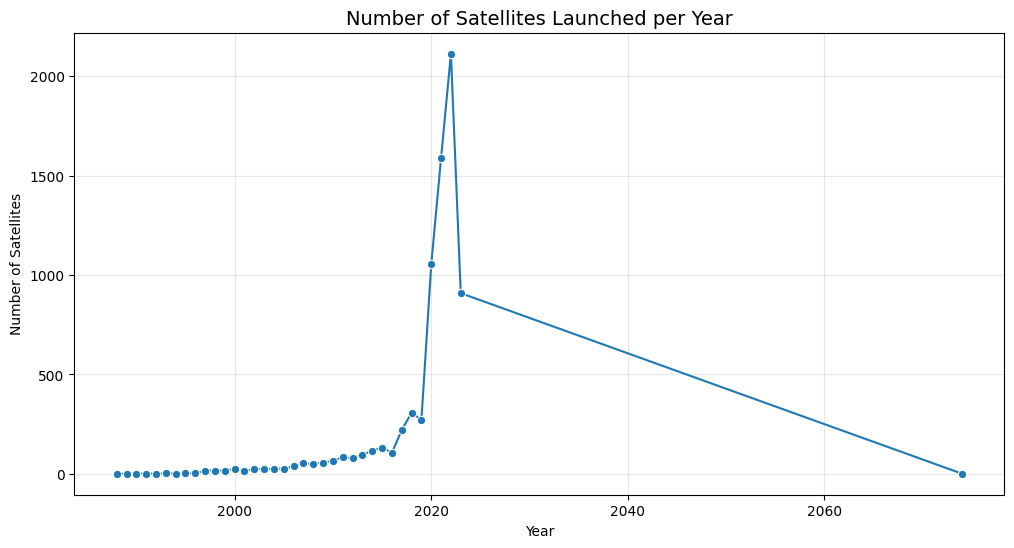

In [7]:
df_core['launch_year']= df_core['date_of_launch'].dt.year

launches_per_year= df_core['launch_year'].value_counts().sort_index()
print("\nNumber of launches per year:\n", launches_per_year)

plt.figure(figsize=(12,6))
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values, marker="o")
plt.title("Number of Satellites Launched per Year", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Satellites")
plt.grid(True, alpha=0.3)
plt.show()

# Step 06: Correlation Analysis


Top 20 countries by satellite count:
 country_of_operatorowner
USA               5165
United Kingdom     651
China              617
Russia             181
Japan               87
ESA                 63
Multinational       63
Canada              60
India               59
Luxembourg          57
Argentina           47
Germany             47
France              33
Israel              29
Finland             25
Spain               24
Australia           23
South Korea         21
Brazil              15
Italy               15
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_9236\330841257.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sat_by_country.values, y=sat_by_country.index, palette="viridis")


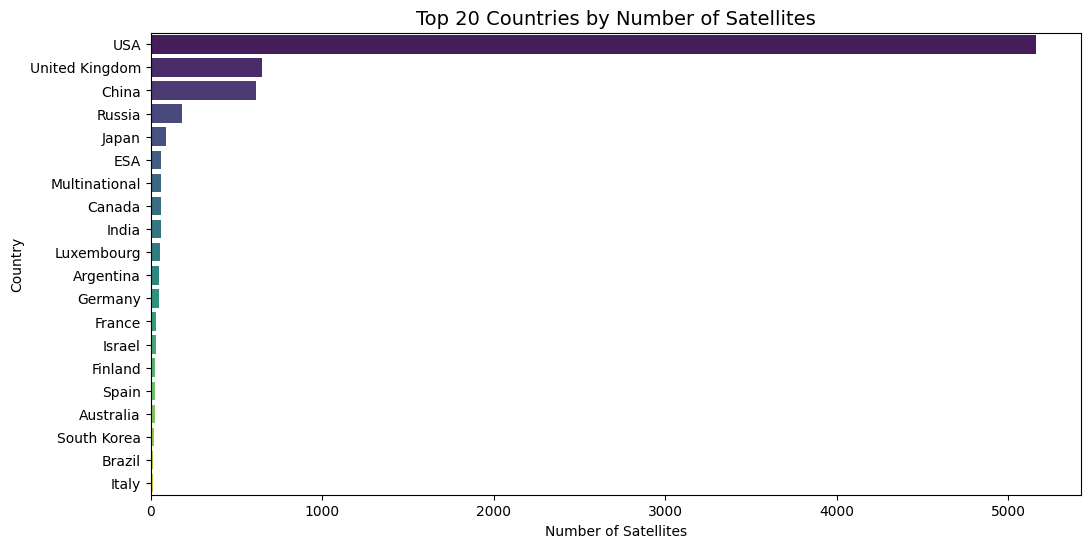

In [8]:
sat_by_country = df_core['country_of_operatorowner'].value_counts().head(20) 
print("Top 20 countries by satellite count:\n", sat_by_country)

plt.figure(figsize=(12,6))
sns.barplot(x=sat_by_country.values, y=sat_by_country.index, palette="viridis")
plt.title("Top 20 Countries by Number of Satellites", fontsize=14)
plt.xlabel("Number of Satellites")
plt.ylabel("Country")
plt.show()


Satellite by class of oribt:
class_of_orbit
LEO           6767
GEO            590
MEO            143
Elliptical      59
LEo              1
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_9236\2897347043.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sat_by_orbit.index, y=sat_by_orbit.values, palette="coolwarm")


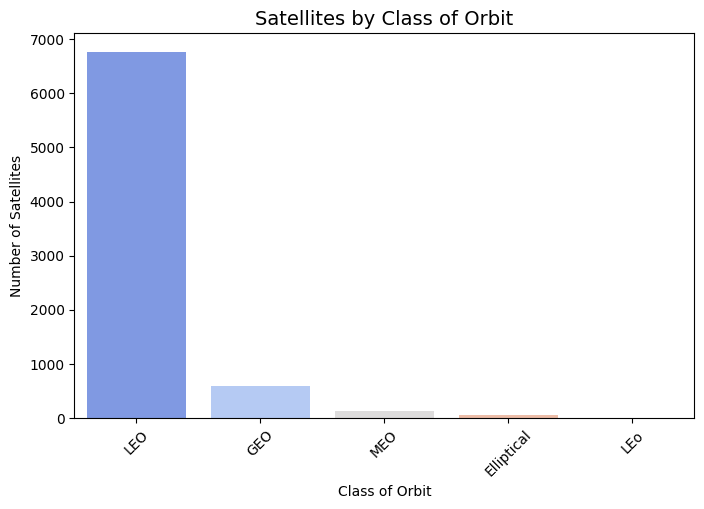

In [13]:
# Satellite by class of oribt
sat_by_orbit = df_core['class_of_orbit'].value_counts()
print("\nSatellite by class of oribt:")
print(sat_by_orbit)

plt.figure(figsize=(8,5))
sns.barplot(x=sat_by_orbit.index, y=sat_by_orbit.values, palette="coolwarm")
plt.title("Satellites by Class of Orbit", fontsize=14)
plt.xlabel("Class of Orbit")
plt.ylabel("Number of Satellites")
plt.xticks(rotation=45)
plt.show()


Top 10 purposes:
 purpose
Communications                     5514
Earth Observation                  1235
Technology Development              372
Navigation/Global Positioning       142
Space Science                        99
Technology Demonstration             64
Earth Science                        28
Surveillance                         20
Navigation/Regional Positioning      13
Unknown                              10
Name: count, dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_9236\1361832133.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sat_by_purpose.index, y=sat_by_purpose.values, palette="magma")


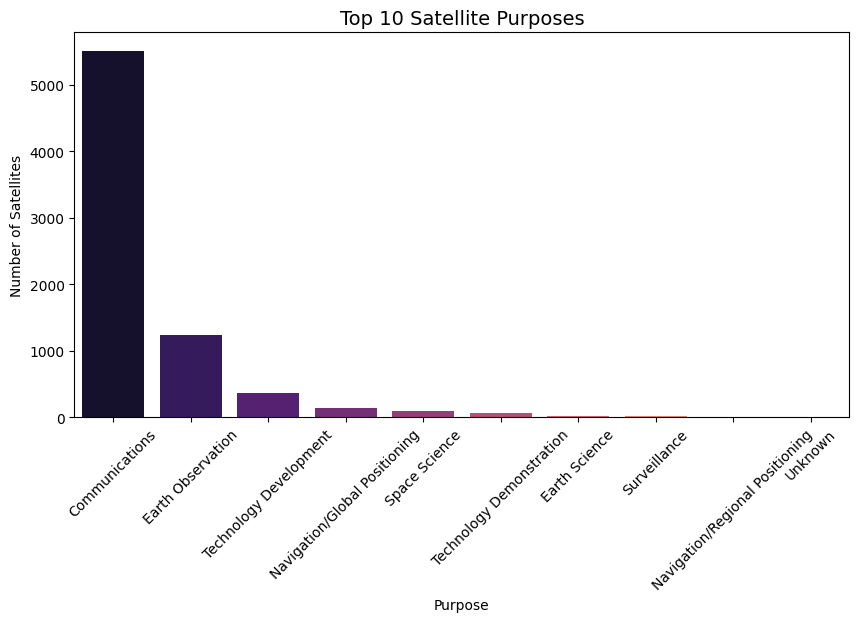

In [16]:
# Count satellites by purpose
sat_by_purpose = df_core['purpose'].value_counts().head(10)
print("\nTop 10 purposes:\n", sat_by_purpose)

# Plot top 10 purposes
plt.figure(figsize=(10,5))
sns.barplot(x=sat_by_purpose.index, y=sat_by_purpose.values, palette="magma")
plt.title("Top 10 Satellite Purposes", fontsize=14)
plt.xlabel("Purpose")
plt.ylabel("Number of Satellites")
plt.xticks(rotation=45)
plt.show()

# Step 07: Pivot Tables & Trends

In [17]:
df_core['launch_decade'] = (df_core['launch_year'] // 10) * 10

pivot_country_decade = pd.pivot_table(
    df_core,
    values='current_official_name_of_satellite',  # just counts
    index='country_of_operatorowner',
    columns='launch_decade',
    aggfunc='count',
    fill_value=0
)

pivot_country_decade['total'] = pivot_country_decade.sum(axis=1)
top_countries = pivot_country_decade.sort_values('total', ascending=False).head(10)

print("Top 10 countries by decade:\n", top_countries)

Top 10 countries by decade:
 launch_decade             1980.0  1990.0  2000.0  2010.0  2020.0  2070.0  \
country_of_operatorowner                                                   
USA                            2      51     125     564    4420       1   
United Kingdom                 0       4       7      47     593       0   
China                          0       0      25     309     282       0   
Russia                         0       0      29     115      37       0   
Japan                          0       0      12      51      24       0   
ESA                            0       2       7      44      10       0   
Multinational                  0       3      22      32       6       0   
Canada                         0       0      12      24      24       0   
India                          0       0       4      48       7       0   
Luxembourg                     0       2       7      20      28       0   

launch_decade             total  
country_of_operatorowner

C:\Users\asus\AppData\Local\Temp\ipykernel_9236\1813295983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core['launch_decade'] = (df_core['launch_year'] // 10) * 10


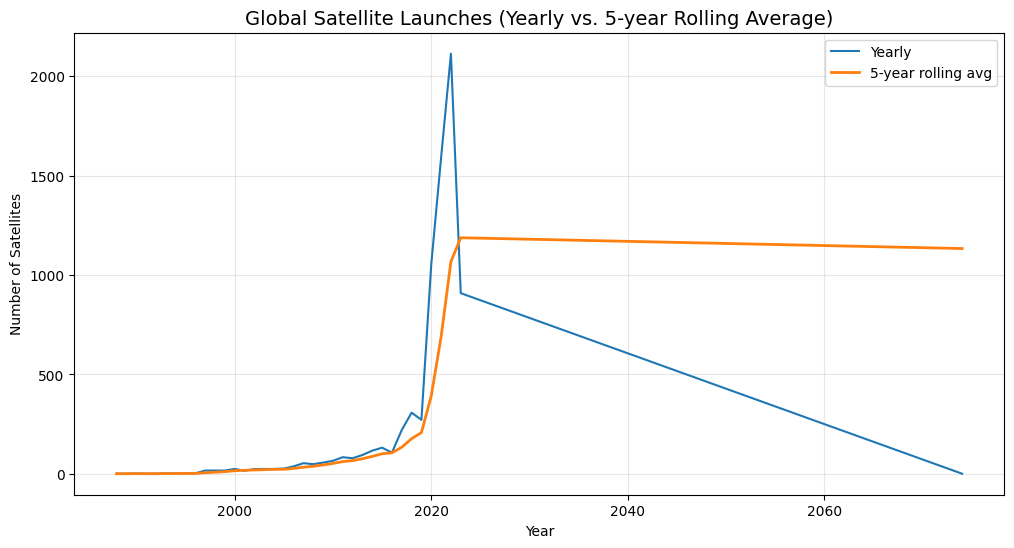

In [18]:
# Rolling average of global launches (5 years)
launches_per_year = df_core.groupby('launch_year').size()
rolling_avg = launches_per_year.rolling(window=5, min_periods=1).mean()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=launches_per_year.index, y=launches_per_year.values, label="Yearly")
sns.lineplot(x=rolling_avg.index, y=rolling_avg.values, label="5-year rolling avg", linewidth=2)
plt.title("Global Satellite Launches (Yearly vs. 5-year Rolling Average)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Number of Satellites")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Step 08: Insight

### 1. Global Launch Trends
- Satellite launches have accelerated sharply since the 2010s.
- The rolling 5-year average shows unprecedented growth in the 2020s, largely due to commercial operators (SpaceX, OneWeb, etc.).

### 2. Country-Level Analysis
- The United States dominates overall satellite count, with strong acceleration after 2015.
- China has rapidly increased its launches since ~2010, closing the gap with Russia.
- Russia shows a steady but slower pace compared to US and China.

### 3. Orbit Characteristics
- LEO (Low Earth Orbit) dominates, reflecting the rise of mega-constellations.
- GEO remains critical for communications but represents a smaller share of total satellites.
- MEO is comparatively rare (navigation satellites like GPS, Galileo, BeiDou).

### 4. Purposes and Applications
- Communications and Earth Observation satellites represent the largest shares.
- Navigation and scientific missions are smaller but strategically critical.
- Military satellites are present but fewer in number compared to commercial.

### 5. Policy/Strategic Implications
- The space environment is becoming congested, with collision and debris risks increasing.
- US and Chinese competition is clearly visible in the growth curves.
- Commercial actors are driving new growth, shifting space from state-driven to market-driven.


# Step 09: Word Report

In [19]:
!pip install python-docx


   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   --------------------------------- ------ 3.4/4.0 MB 31.6 MB/s eta 0:00:01
   --------------------------------- ------ 3.4/4.0 MB 31.6 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 7.4 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [lxml]
   ---------------------------------------- 0/2 [lxml]
   -------------------- ------------------- 1/2 [python-docx]
   -------------------- ------------------- 1/2 [python-docx]
   ---------------------------------------- 2/2 [python-docx]




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from docx import Document
from docx.shared import Inches
import matplotlib.pyplot as plt
import os

# Create a new Document
doc = Document()

# --- Title Page ---
doc.add_heading("Satellite Dataset Analysis Report", 0)
doc.add_paragraph("Based on UCS Satellite Database")
doc.add_paragraph("Generated by: Your Name")
doc.add_paragraph("Date: " + pd.Timestamp.today().strftime("%Y-%m-%d"))

doc.add_page_break()

# --- Executive Summary ---
doc.add_heading("Executive Summary", level=1)
doc.add_paragraph(
    "This report provides an analysis of the UCS Satellite Database. "
    "Key insights include:\n"
    "- The top countries operating satellites.\n"
    "- Yearly launch trends.\n"
    "- Orbit classifications and distribution.\n"
    "- Statistics on satellite mass, lifetime, and power.\n"
)

doc.add_page_break()

# --- Dataset Overview ---
doc.add_heading("Dataset Overview", level=1)
doc.add_paragraph(f"Total records: {len(df_core)}")
doc.add_paragraph(f"Total columns: {df_core.shape[1]}")
doc.add_paragraph("Key columns include satellite name, operator, purpose, orbit class, launch date, and mass.")

# Missing values table
missing_values = df_core.isnull().sum().sort_values(ascending=False)
doc.add_heading("Missing Values (Top 10)", level=2)
for col, val in missing_values.head(10).items():
    doc.add_paragraph(f"{col}: {val} missing")

doc.add_page_break()

# --- Top Countries by Satellite Count ---
doc.add_heading("Top Countries by Number of Satellites", level=1)
country_counts = df_core['country_of_operatorowner'].value_counts().head(10)

# Add table
table = doc.add_table(rows=1, cols=2)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Country'
hdr_cells[1].text = 'Number of Satellites'

for country, count in country_counts.items():
    row_cells = table.add_row().cells
    row_cells[0].text = str(country)
    row_cells[1].text = str(count)

# Plot and save chart
plt.figure(figsize=(6,4))
country_counts.plot(kind='bar')
plt.title("Top 10 Countries by Satellites")
plt.ylabel("Count")
plt.tight_layout()
chart_path = "../reports/top_countries.png"
plt.savefig(chart_path)
plt.close()

doc.add_picture(chart_path, width=Inches(5))

doc.add_page_break()

# --- Launches per Year ---
doc.add_heading("Launch Trends Over Time", level=1)
launches_per_year = df_core['date_of_launch'].dt.year.value_counts().sort_index()

plt.figure(figsize=(8,4))
launches_per_year.plot(kind='line', marker='o')
plt.title("Number of Launches per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
chart_path = "../reports/launches_per_year.png"
plt.savefig(chart_path)
plt.close()

doc.add_picture(chart_path, width=Inches(6))

doc.add_page_break()

# --- Orbit Distribution ---
doc.add_heading("Orbit Distribution", level=1)
orbit_counts = df_core['class_of_orbit'].value_counts()

plt.figure(figsize=(6,6))
orbit_counts.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Orbit Class Distribution")
plt.tight_layout()
chart_path = "../reports/orbit_distribution.png"
plt.savefig(chart_path)
plt.close()

doc.add_picture(chart_path, width=Inches(5))

doc.add_page_break()

# --- Mass & Lifetime Stats ---
doc.add_heading("Satellite Mass & Lifetime Statistics", level=1)
desc_stats = df_core[['launch_mass_kg', 'expected_lifetime_yrs']].describe()

# Table for stats
table = doc.add_table(rows=1, cols=len(desc_stats.columns)+1)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = "Stat"
for i, col in enumerate(desc_stats.columns):
    hdr_cells[i+1].text = col

for stat in desc_stats.index:
    row_cells = table.add_row().cells
    row_cells[0].text = stat
    for i, col in enumerate(desc_stats.columns):
        val = desc_stats.loc[stat, col]
        row_cells[i+1].text = f"{val:.2f}"

# Save report
report_path = "../reports/satellite_analysis_report.docx"
doc.save(report_path)

print(f" Report saved at: {report_path}")


 Report saved at: ../reports/satellite_analysis_report.docx
